# Exercício 1

     mean perimeter  mean concave points
0            122.80              0.14710
1            132.90              0.07017
2            130.00              0.12790
3             77.58              0.10520
4            135.10              0.10430
..              ...                  ...
564          142.00              0.13890
565          131.20              0.09791
566          108.30              0.05302
567          140.10              0.15200
568           47.92              0.00000

[569 rows x 2 columns]
[-1.00476428 -2.13326676]|x> + 0.36994090526374684
Margin = 0.8481600732295937
Support vector: [ 0.78388933 -0.53004431]

[-0.83053029 -1.81962412]|x> + 0.34382171636662573
Margin = 0.9998984514872563
Support vector: [ 0.78388933 -0.53004431]

[-0.53820979 -0.69114932]|x> + 0.39017307679826274
Margin = 2.28313306374807
Support vector: [ 0.78388933 -0.53004431]



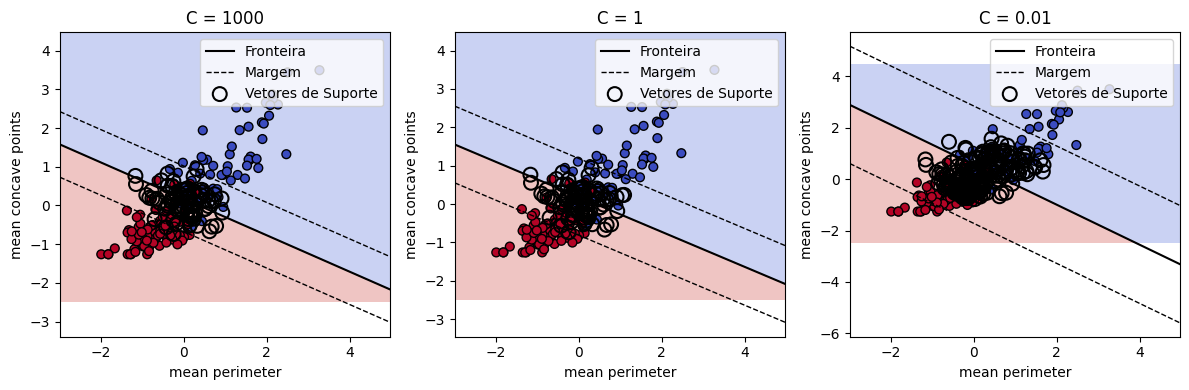

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


DECIMAL_DIGITS = 4

features = ["mean perimeter", "mean concave points"]

C_values = [1000, 1, 0.01]
n        = len(C_values)
ncols    = 3
nrows    = (n + 1) // ncols # 1 linha

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 4 * nrows))
axes = axs.flatten()

dataset       = load_breast_cancer()
df            = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df["classes"] = dataset.target

X = df[features]
y = df["classes"]


scaler   = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


model = SVC(kernel="linear")

for i, C in enumerate(C_values):
    model.set_params(C=C)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc    = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    ax = axes[i]
    x_min = X_scaled[:, 0].min() - 1
    x_max = X_scaled[:, 0].max() + 1
    y_min = X_scaled[:, 1].min() - 0.5
    y_max = X_scaled[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.3)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="coolwarm", edgecolors="k", s=40)

    w = model.coef_[0]
    b = model.intercept_[0]
    slope = -w[0] / w[1]
    intercept = -b / w[1]
    margin = 2 / np.linalg.norm(w)

    print(f"{w}|x> + {b}")
    print(f"Margin = {margin}")
    print(f"Support vector: {model.support_vectors_[0]}", end="\n\n")

    x_vals = np.linspace(x_min, x_max, 200)
    y_vals = slope * x_vals + intercept
    y_margin_up = y_vals + margin
    y_margin_down = y_vals - margin

    ax.plot(x_vals, y_vals, "k-", label="Fronteira")
    ax.plot(x_vals, y_margin_up, "k--", linewidth=1, label="Margem")
    ax.plot(x_vals, y_margin_down, "k--", linewidth=1)

    ax.set_title(f"C = {C}")
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])
    ax.legend(loc="upper right")

    support_vectors = model.support_vectors_
    ax.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        facecolors='none',
        edgecolors='k',
        linewidths=1.5,
        label='Vetores de Suporte'
    )
    ax.legend(loc="upper right")

plt.tight_layout()
plt.show()


## Margens

- C = 1000 -> margem de 0.42
- C = 1    -> margem de 0.49
- C = 0.01 -> margem de 1.14

# Exercícios 2

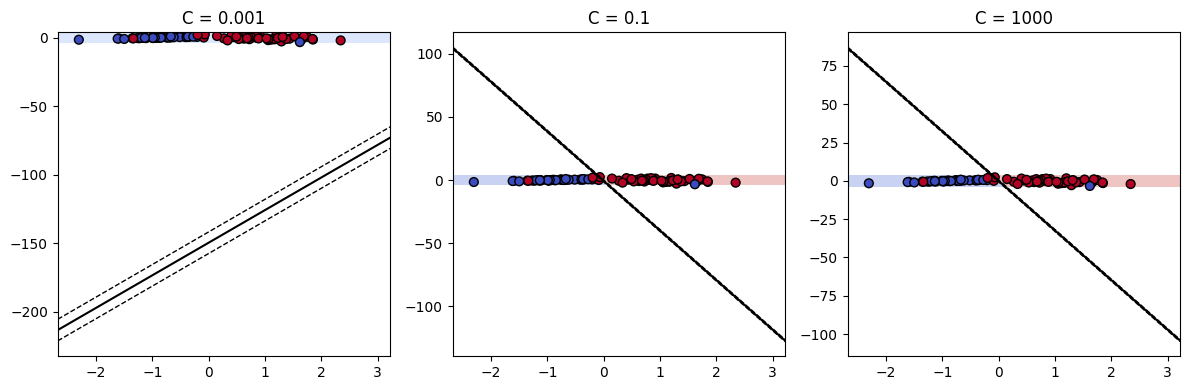

,C,Accuracy,Precision (macro avg),Recall (macro avg),F1-score (macro avg)
0,0.001,0.5,0.2500,0.5,0.3333
1,0.100,0.9,0.9002,0.9,0.9000
2,1000.000,0.9,0.9002,0.9,0.9000


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler



C_values = [0.001, 0.1, 1000]
n        = len(C_values)
ncols    = 3
nrows    = (n + ncols - 1) // ncols  # Cálculo correto do número de linhas

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 4 * nrows))
axes = axs.flatten()

# Definindo n_features=2 para permitir plotagem
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0, n_clusters_per_class=1, flip_y=0.2, random_state=42)

# Dividir antes de escalar para evitar vazamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

# Escalar com base apenas no treino
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

results = []
model = SVC(kernel="linear")

for i, C in enumerate(C_values):
    model.set_params(C=C)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

    results.append({
        "C": C,
        "Accuracy": round(accuracy, 4),
        "Precision (macro avg)": round(report['macro avg']['precision'], 4),
        "Recall (macro avg)": round(report['macro avg']['recall'], 4),
        "F1-score (macro avg)": round(report['macro avg']['f1-score'], 4)
    })

    # Fronteira de decisão e margens
    ax = axes[i]
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='k', s=40)

    w = model.coef_[0]
    b = model.intercept_[0]
    slope = -w[0] / w[1]
    intercept = -b / w[1]
    margin = 1 / np.linalg.norm(w)

    x_vals = np.linspace(x_min, x_max, 200)
    y_vals = slope * x_vals + intercept
    y_margin_up = y_vals + margin
    y_margin_down = y_vals - margin

    ax.plot(x_vals, y_vals, 'k-', label='Fronteira')
    ax.plot(x_vals, y_margin_up, 'k--', linewidth=1, label='Margem')
    ax.plot(x_vals, y_margin_down, 'k--', linewidth=1)

    ax.set_title(f'C = {C}')

plt.tight_layout()
plt.show()


df_results = pd.DataFrame(results)
display(df_results)
